In [5]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier

In [6]:
df = pd.read_csv("Thyroid_Diff.csv")

pd.options.display.max_columns = 50

df.head(3)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [7]:
dummies =  pd.get_dummies(df, columns=['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred'], prefix=['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred'],drop_first=True)
dummies.head()

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,T_T1b,T_T2,T_T3a,T_T3b,T_T4a,T_T4b,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,34,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,30,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,62,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,62,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


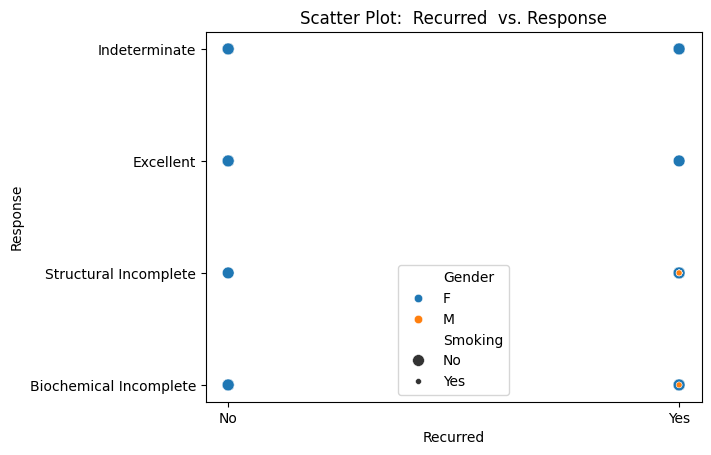

In [8]:
sns.scatterplot(data=df, y="Response", x="Recurred",hue="Gender",size="Smoking")
plt.title("Scatter Plot:  Recurred  vs. Response")
plt.ylabel("Response")
plt.xlabel("Recurred")

plt.show()

In [9]:
X = dummies.drop(['Recurred_Yes'],axis=1)
y = dummies['Recurred_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    AdaBoostClassifier(algorithm="SAMME", random_state=42)
]
classifier_names = ['KNN','svm_l','svm_rbf','DTC','RFC','MLPC',' NB_G','QDA','ABC']
scores = {}
for name, clf in zip(classifier_names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: Accuracy = {score:.2f}")
    scores.update({name: int(score*100)})

KNN: Accuracy = 0.95
svm_l: Accuracy = 0.96
svm_rbf: Accuracy = 0.75
DTC: Accuracy = 0.95
RFC: Accuracy = 0.96
MLPC: Accuracy = 0.97
 NB_G: Accuracy = 0.84
QDA: Accuracy = 0.84


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


ABC: Accuracy = 0.95


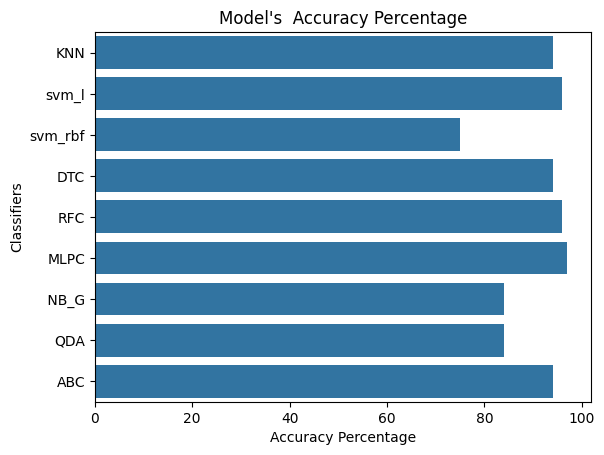

In [10]:
keys = list(scores.keys())
values = list(scores.values())

sns.barplot(x=values,y=keys)
plt.ylabel('Classifiers')
plt.xlabel('Accuracy Percentage')
plt.title("Model's  Accuracy Percentage")
plt.show()

In [11]:
Model = MLPClassifier(alpha=1, max_iter=1000, random_state=42).fit(X_train, y_train)
Model.score( X_test,y_test )

0.974025974025974

In [20]:
# Get the first row and reshape it to 2D
data = X_test.iloc[1].values.reshape(1, -1)

# Predict the class for the single sample
val = Model.predict(data)

# Print the predicted class
print(val)


[False]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
